In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [58]:
df = pd.read_csv("Day2_Homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [59]:
df = df.interpolate()
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [60]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
reg.coef_

array([[  110.76035614, 23256.46711536, -3238.45104247]])

In [62]:
reg.intercept_

array([228372.6513182])

In [63]:
reg.predict([[3000,3,40]])

array([[500885.07939991]])

In [64]:
110.76035614 * 3000 + 23256.46711536 * 3 + -3238.45104247*40 + 228372.6513182

500885.07938548

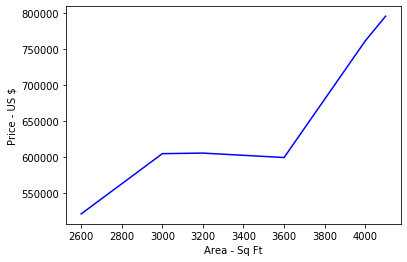

In [65]:
%matplotlib inline
plt.xlabel("Area - Sq Ft")
plt.ylabel("Price - US $")
plt.plot(df.area, reg.predict(df[['area','bedrooms','age']]), color ='blue')

In [66]:
df = pd.read_csv("Day2_Exercise.csv")
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [67]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [68]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [70]:
df=df.interpolate()
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [71]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']],df['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [74]:
reg.predict([[12,10,10]])

array([93747.79628651])